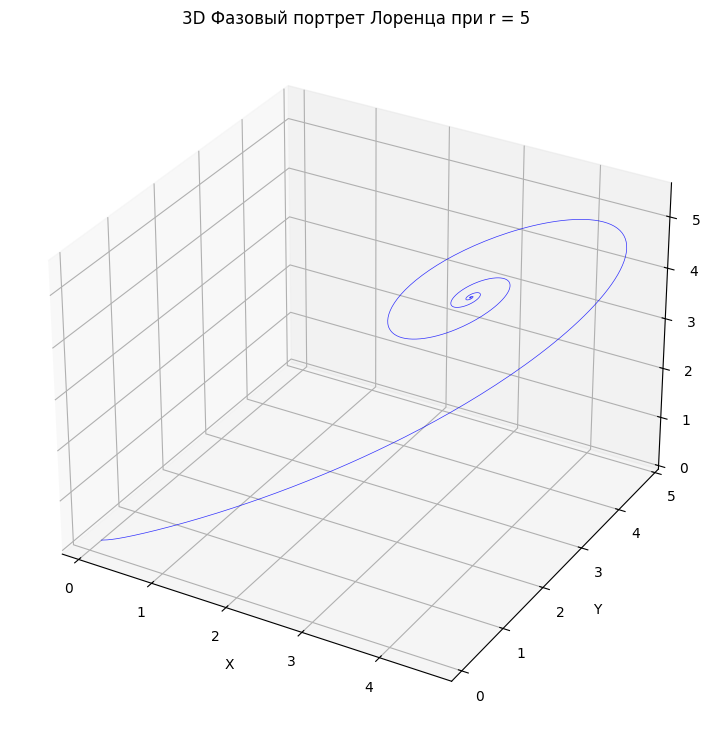

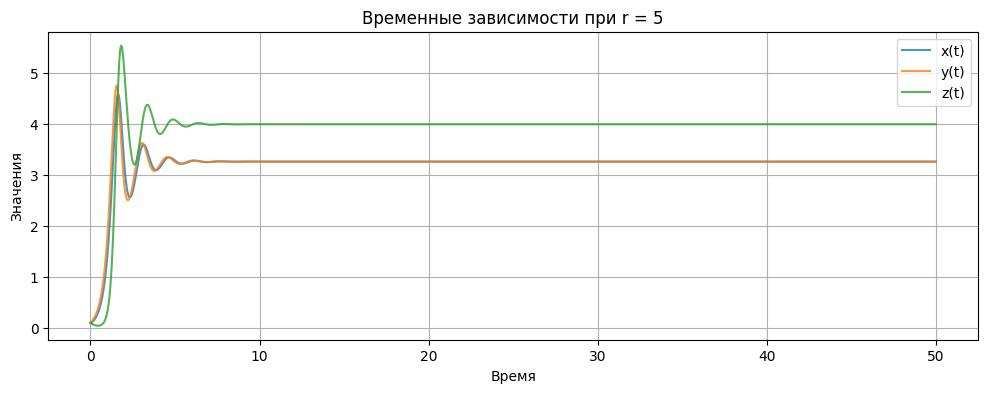

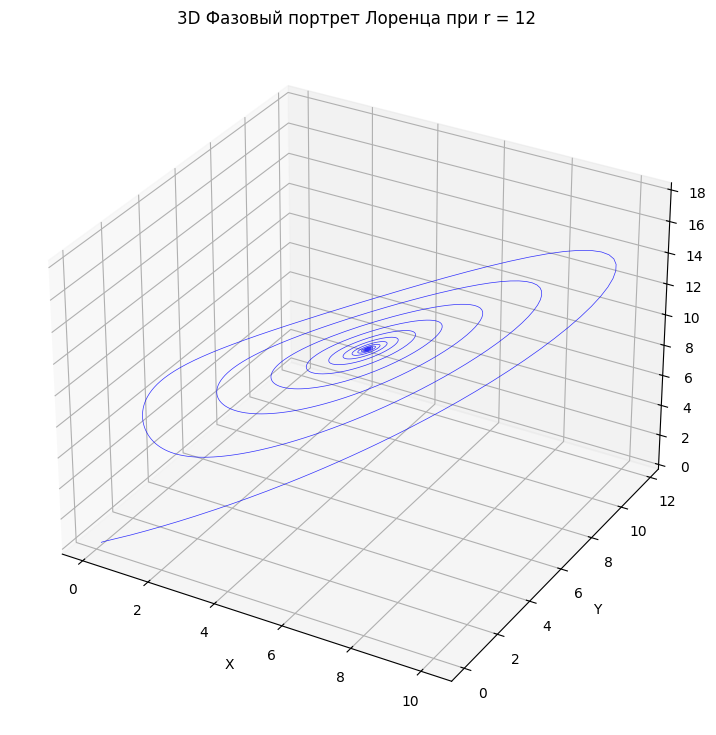

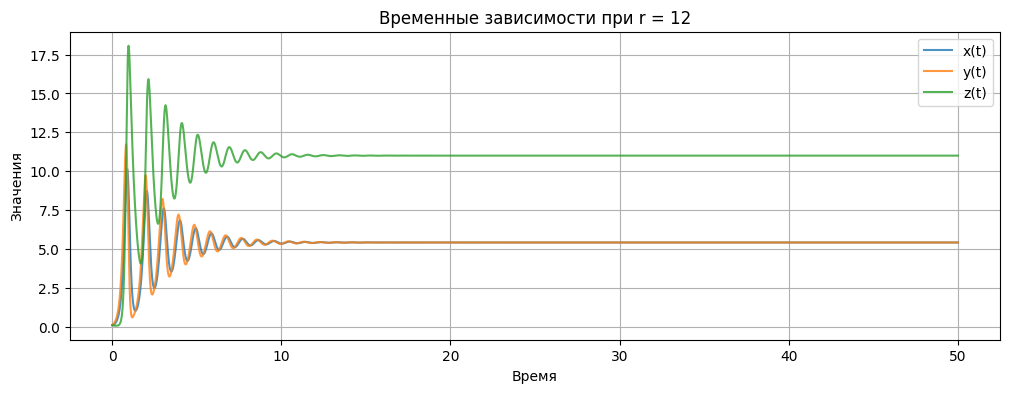

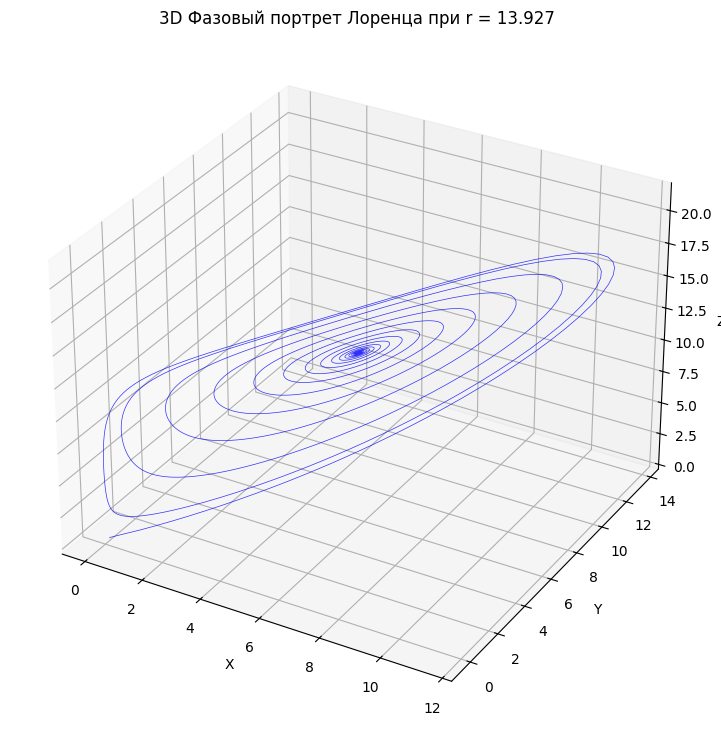

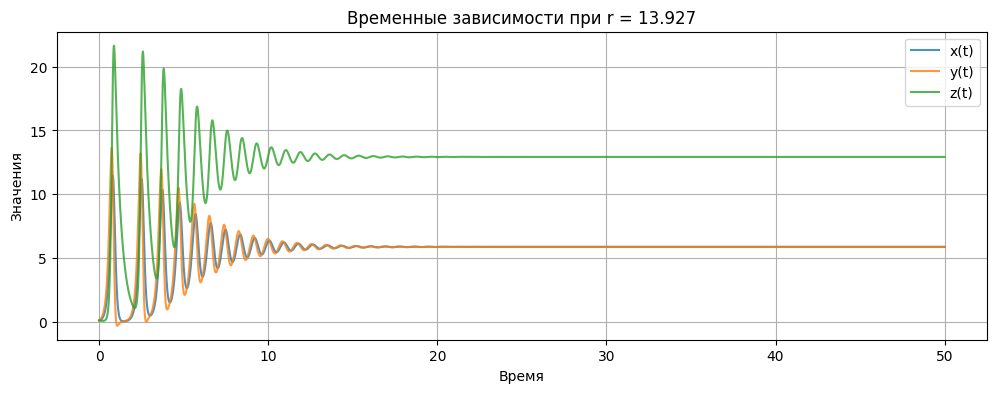

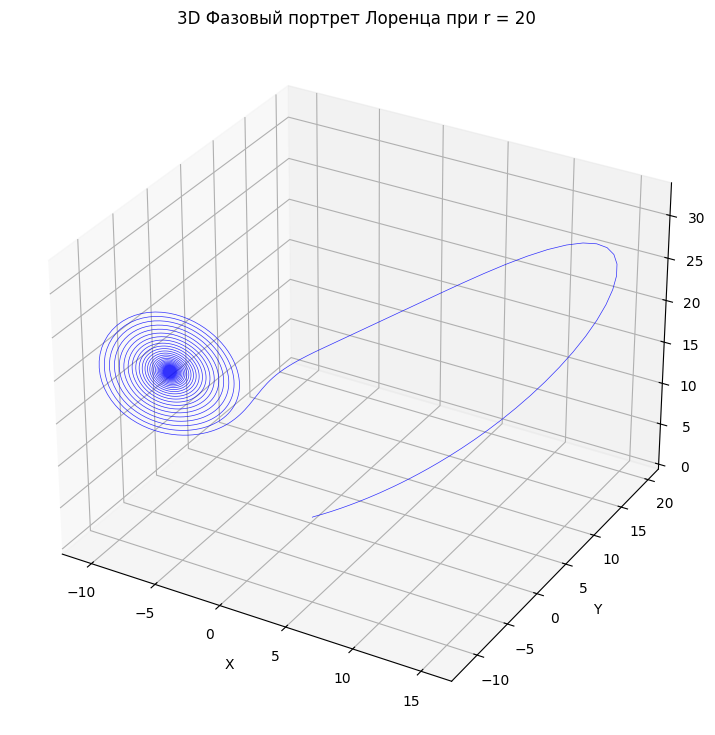

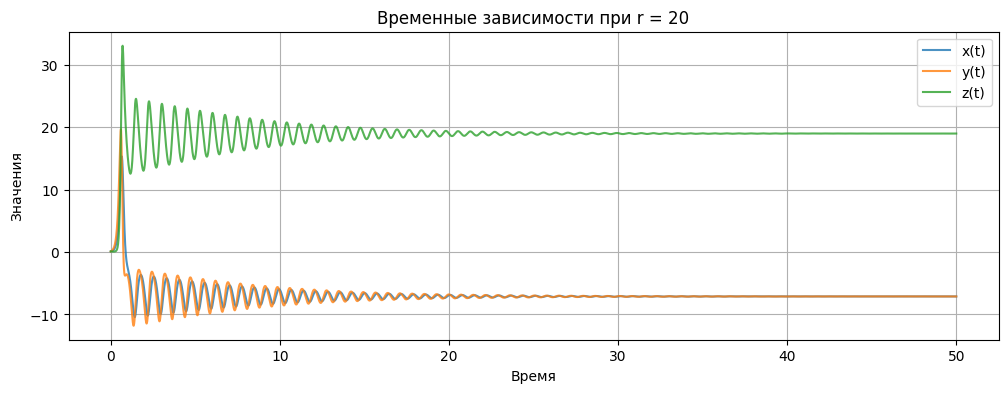

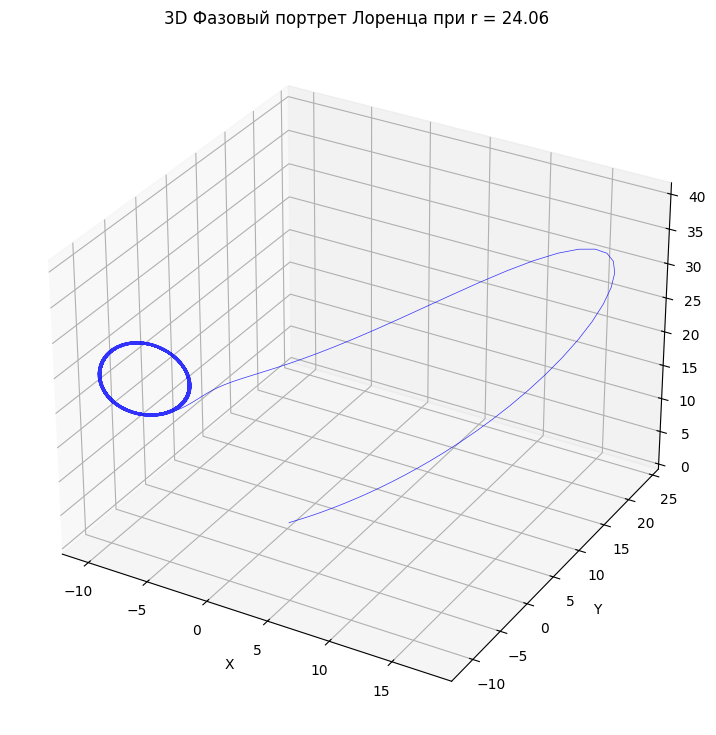

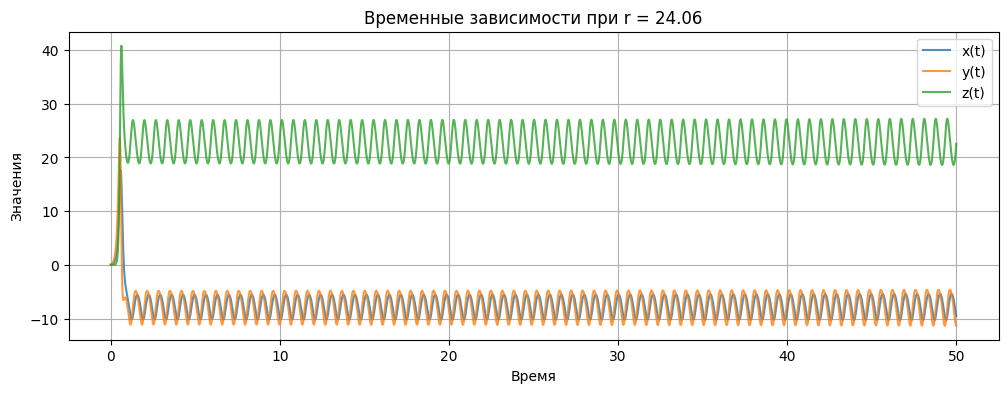

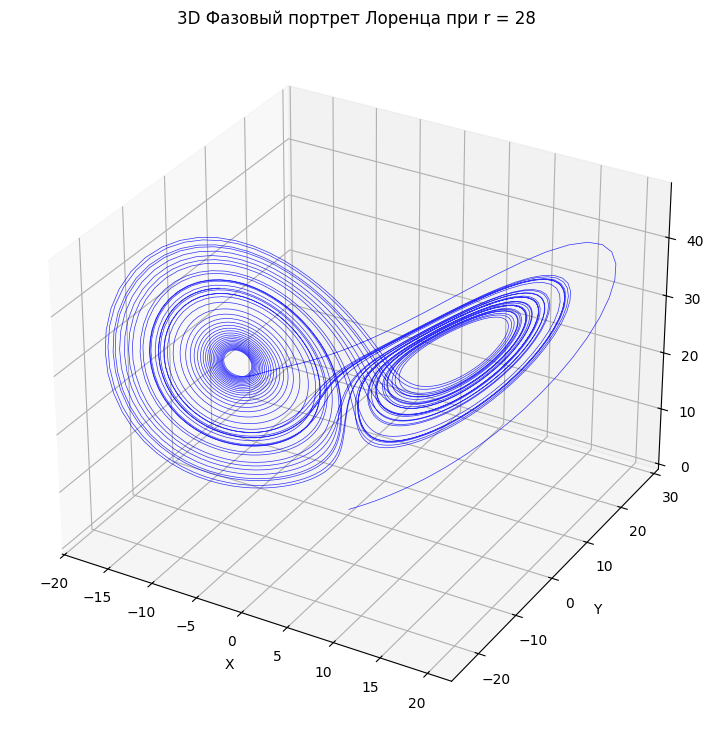

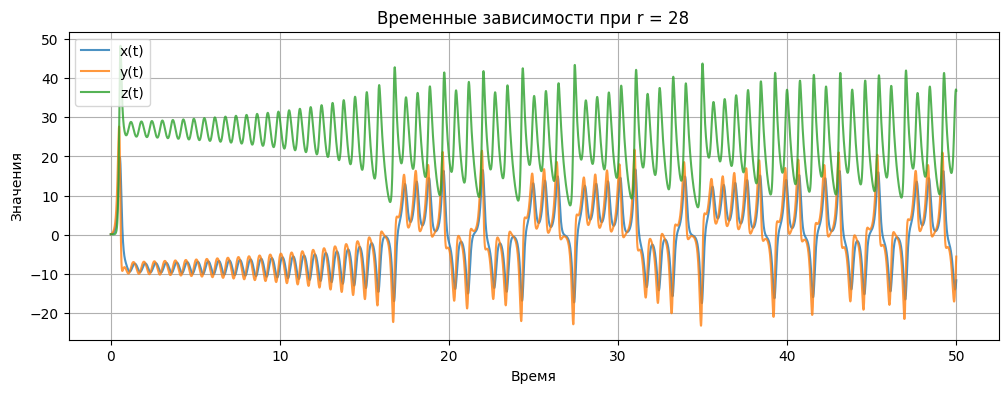

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Параметры системы
sigma = 10.0
b = 8.0 / 3.0
r_values = [5, 12, 13.927, 20, 24.06, 28]
initial_conditions = (0.1, 0.1, 0.1)

# Параметры интегрирования
t_start = 0.0
t_end = 50.0  # Оптимизировано для визуализации
h = 0.01

def lorenz_derivs(x, y, z, r):
    dxdt = sigma * (y - x)
    dydt = r * x - y - x * z
    dzdt = x * y - b * z
    return dxdt, dydt, dzdt

def solve_lorenz(r, x0, y0, z0, t_start, t_end, h):
    num_steps = int((t_end - t_start) / h)
    t = np.linspace(t_start, t_end, num_steps)
    x = np.zeros(num_steps)
    y = np.zeros(num_steps)
    z = np.zeros(num_steps)
    x[0], y[0], z[0] = x0, y0, z0

    for i in range(num_steps - 1):
        current_x, current_y, current_z = x[i], y[i], z[i]
        
        k1_dx, k1_dy, k1_dz = lorenz_derivs(current_x, current_y, current_z, r)
        k2_dx, k2_dy, k2_dz = lorenz_derivs(
            current_x + h*k1_dx/2, 
            current_y + h*k1_dy/2, 
            current_z + h*k1_dz/2, r
        )
        k3_dx, k3_dy, k3_dz = lorenz_derivs(
            current_x + h*k2_dx/2, 
            current_y + h*k2_dy/2, 
            current_z + h*k2_dz/2, r
        )
        k4_dx, k4_dy, k4_dz = lorenz_derivs(
            current_x + h*k3_dx, 
            current_y + h*k3_dy, 
            current_z + h*k3_dz, r
        )
        
        x[i+1] = current_x + (k1_dx + 2*k2_dx + 2*k3_dx + k4_dx)*h/6
        y[i+1] = current_y + (k1_dy + 2*k2_dy + 2*k3_dy + k4_dy)*h/6
        z[i+1] = current_z + (k1_dz + 2*k2_dz + 2*k3_dz + k4_dz)*h/6

    return t, x, y, z

# Визуализация
for r in r_values:
    t, x, y, z = solve_lorenz(r, *initial_conditions, t_start, t_end, h)
    
    # Трехмерный фазовый портрет
    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x, y, z, lw=0.5, color='blue', alpha=0.8)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'3D Фазовый портрет Лоренца при r = {r}')
    
    # Оптимальный угол обзора
    # ax.view_init(elev=15, azim=45)
    plt.show()
    
    # Временная зависимость
    plt.figure(figsize=(12, 4))
    plt.plot(t, x, label='x(t)', alpha=0.8)
    plt.plot(t, y, label='y(t)', alpha=0.8)
    plt.plot(t, z, label='z(t)', alpha=0.8)
    plt.title(f'Временные зависимости при r = {r}')
    plt.xlabel('Время')
    plt.ylabel('Значения')
    plt.legend()
    plt.grid(True)
    plt.show()